# Import required Libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile

# Importing Data from Kaggle API

In [3]:
#Kaggle API for Car dekho Data
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0
vehicle-dataset-from-cardekho.zip: Skipping, found more recently modified local copy (use --force to force download)


# Loading Data

In [151]:
with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip", 'r') as zip_ref:
    print(zip_ref.namelist())
    
    csv_file = "car data.csv" 
    with zip_ref.open(csv_file) as file:
        df = pd.read_csv(file)

['CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv', 'car data.csv', 'car details v4.csv']


In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Inspection and Exploration 

In [6]:
df.shape

(301, 9)

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.describe(include="O")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


## Transforming Data

In [167]:
#Coverting Selling price and present price into 1000's multiple's
df['Selling_Price']=df['Selling_Price']*1000
df['Present_Price']=df['Present_Price']*1000

In [168]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350.0,5590.0,27000,1,1,1,0
1,sx4,2013,4750.0,9540.0,43000,2,1,1,0
2,ciaz,2017,7250.0,9850.0,6900,1,1,1,0
3,wagon r,2011,2850.0,4150.0,5200,1,1,1,0
4,swift,2014,4600.0,6870.0,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9500.0,11600.0,33988,2,1,1,0
297,brio,2015,4000.0,5900.0,60000,1,1,1,0
298,city,2009,3350.0,11000.0,87934,1,1,1,0
299,city,2017,11500.0,12500.0,9000,2,1,1,0


## Visualizing the Raw Data

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<Axes: xlabel='Fuel Type', ylabel='Price'>

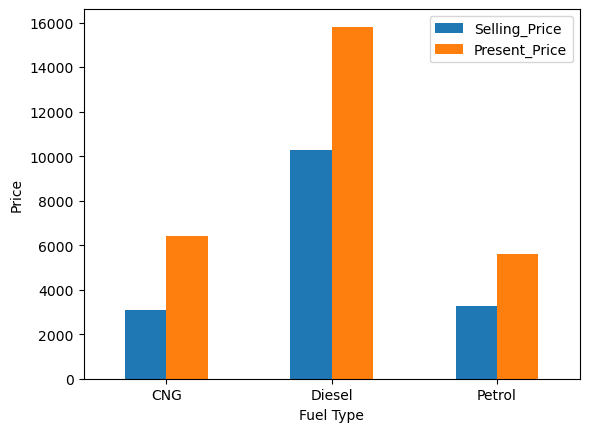

In [37]:
#Difference between Average Selling price and present price by fuel type
avg_price=df.groupby('Fuel_Type')[['Selling_Price','Present_Price']].mean().reset_index()
avg_price
avg_price.plot(x="Fuel_Type",y=["Selling_Price",'Present_Price'],kind="bar",xlabel="Fuel Type",ylabel="Price",rot=360)

<Axes: xlabel='No. of Pre-Owners', ylabel='Selling Price'>

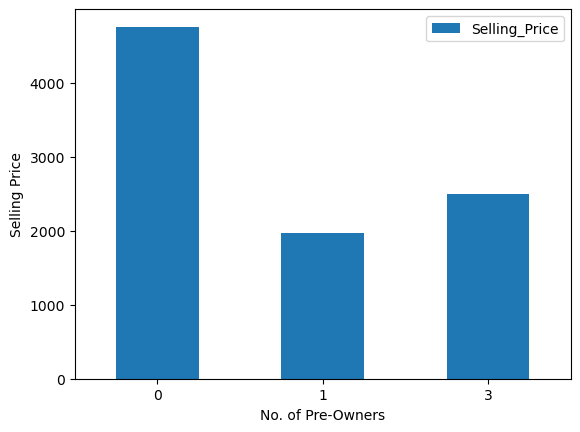

In [43]:
#Average Selling price by No. of owners
owner=df.groupby('Owner')[['Selling_Price']].mean().reset_index()
owner.plot(x='Owner',y='Selling_Price',xlabel="No. of Pre-Owners",ylabel='Selling Price',kind='bar',rot=360)

<Axes: xlabel='Kilometers Driven', ylabel='Mean Selling Price'>

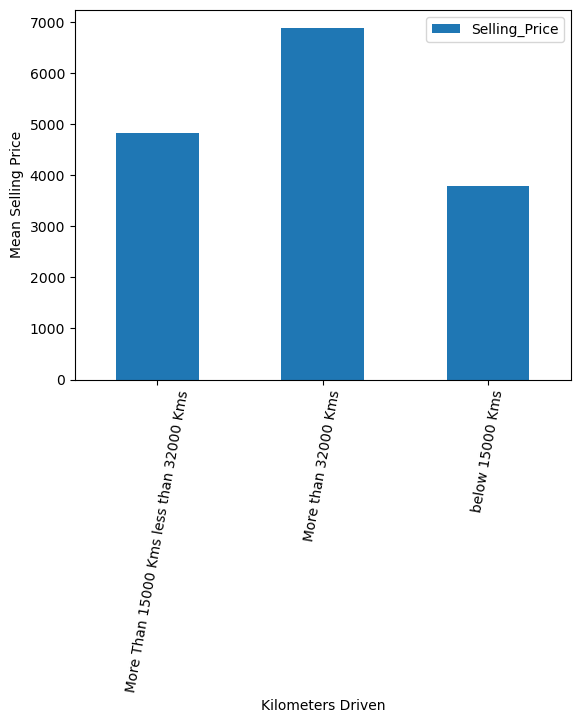

In [88]:
# Average Selling price by Kilometers Driven
q1=df['Kms_Driven'].quantile([.25])
df['kms_rating']=df['Kms_Driven'].apply(lambda x:'below 15000 Kms' if x<15000 else ('More Than 15000 Kms less than 32000 Kms' if x>15000 & x<32000 else 'More than 32000 Kms'))
kms=df.groupby('kms_rating')[['Selling_Price']].mean().reset_index()
kms.plot(x='kms_rating',y='Selling_Price',kind="bar",xlabel='Kilometers Driven',ylabel='Mean Selling Price',rot=80)

<Axes: xlabel='Seller Type', ylabel='Selling Price'>

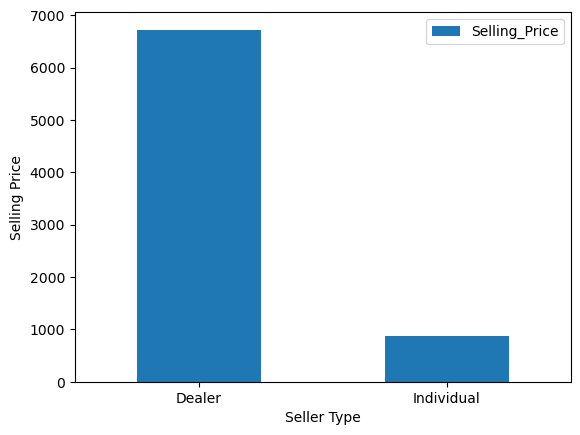

In [96]:
#Average selling price by Seller type
sell=df.groupby('Seller_Type')['Selling_Price'].mean().reset_index()
sell.plot(x='Seller_Type',y='Selling_Price',xlabel='Seller Type',ylabel='Selling Price',rot=360,kind='bar')

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

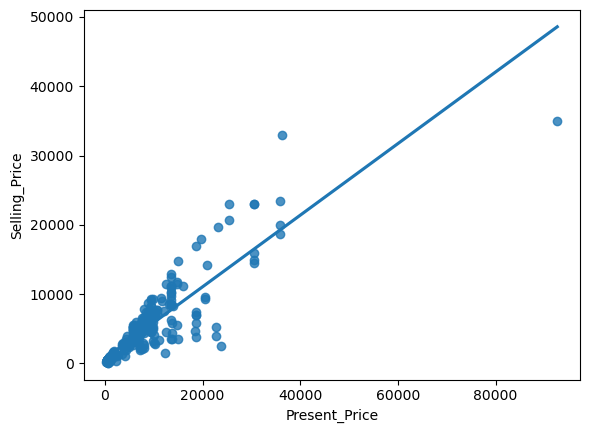

In [120]:
#Correlation Between Selling price and Present price
sns.regplot(x="Present_Price",y="Selling_Price",ci=None,data=df)

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

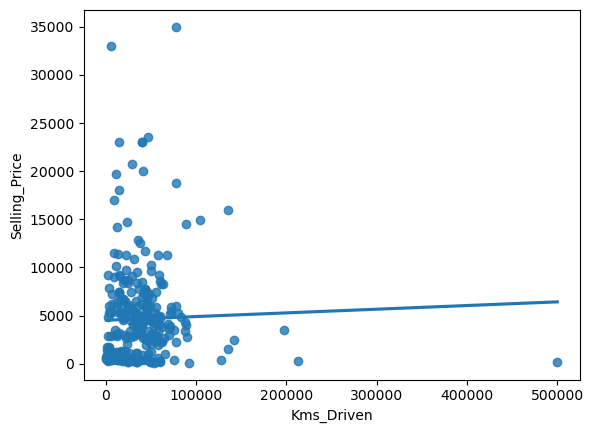

In [119]:
#Correlation between selling price and Kms Driven
sns.regplot(x="Kms_Driven",y="Selling_Price",ci=None,data=df)

## Inference's Through Visualizations

In [121]:
#Vechicles with diesel as fuel type have highest average selling and present price followed by CNG & petrol.
#Vechicles with zero pre-owners have highest mean selling price followed by 3 pre-owner and 1 pre-onwers
#cars with more than 32000 kms driven tend to have higher selling price.
#Cars sold through Dealer tend to have higher selling price
#Selling price and present price have high positive correlation

# Treating Outliers

In [123]:
df.describe()
#Observing the table below we can conclude that column Kms_Driven,present price & selling price have outliwer due the difference between mean and max

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.471761,36947.205980,0.043189
std,2.891554,5082.811556,8644.115402,38886.883882,0.247915
min,2003.000000,100.000000,320.000000,500.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000
max,2018.000000,35000.000000,92600.000000,500000.000000,3.000000


## Vizualizing Outliers

<Axes: >

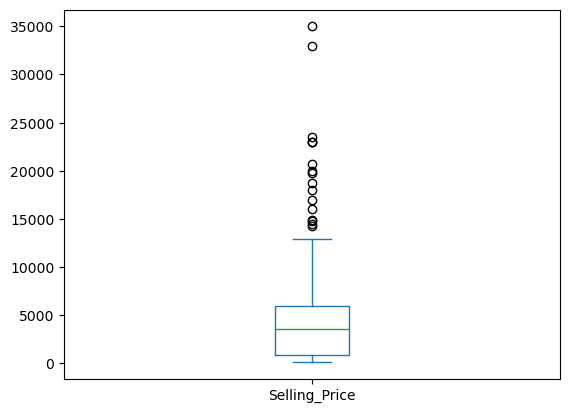

In [127]:
#Selling Price
df['Selling_Price'].plot(kind='box')

<Axes: >

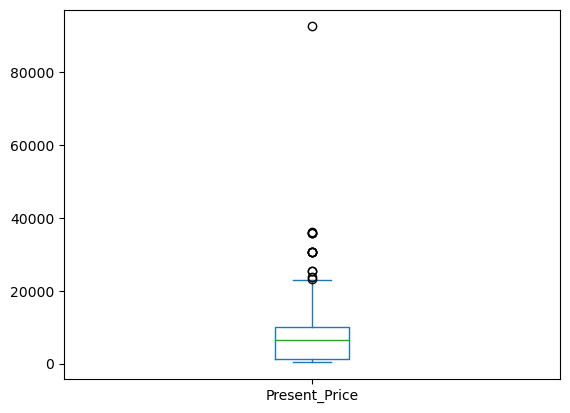

In [128]:
#Present Price
df['Present_Price'].plot(kind='box')

<Axes: >

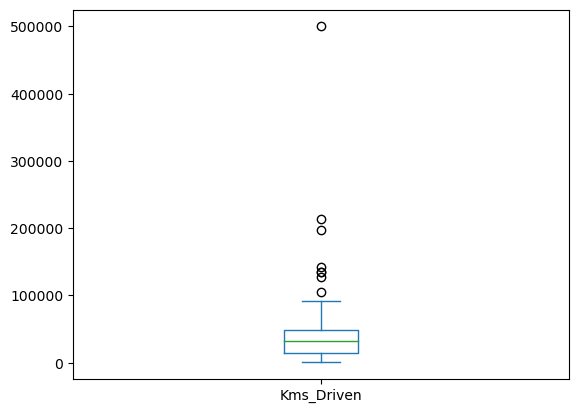

In [129]:
#Kms Driven
df['Kms_Driven'].plot(kind='box')

In [153]:
#The Outliers are not dropped due to its insignificant size

# Feature Engineering

## Binary Encoding

In [154]:
df_copy=df.copy()

In [155]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [161]:
df.Transmission.unique()

array([1, 0])

In [157]:
# Columns Transmission,seller type will be binary encoded
df['Seller_Type']=np.where(df['Seller_Type']=='Dealer',1,0)
#1=Dealer & 0=Individual

In [160]:
df['Transmission']=np.where(df['Transmission']=='Manual',1,0)
#1=Manual & 0= Automatic

In [162]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,1,1,0


## Nominal Encoding

In [164]:
#Columns Fuel type to be nominally encoded
df['Fuel_Type']=df['Fuel_Type'].apply(lambda x:1 if x=="Petrol" else (2 if x=='Diesel' else 3))
#1=Petrol,2=Diesel,3=CNG

In [165]:
df.Fuel_Type.unique()

array([1, 2, 3], dtype=int64)

# Feature Selection

## Feature selection through Pearson's correlation

In [169]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350.0,5590.0,27000,1,1,1,0
1,sx4,2013,4750.0,9540.0,43000,2,1,1,0
2,ciaz,2017,7250.0,9850.0,6900,1,1,1,0
3,wagon r,2011,2850.0,4150.0,5200,1,1,1,0
4,swift,2014,4600.0,6870.0,42450,2,1,1,0


In [171]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [207]:
#Dropping column Car name
df.drop('Car_Name',axis=1,inplace=True)

In [202]:
x=df[['Year','Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y=df['Selling_Price']

<Axes: >

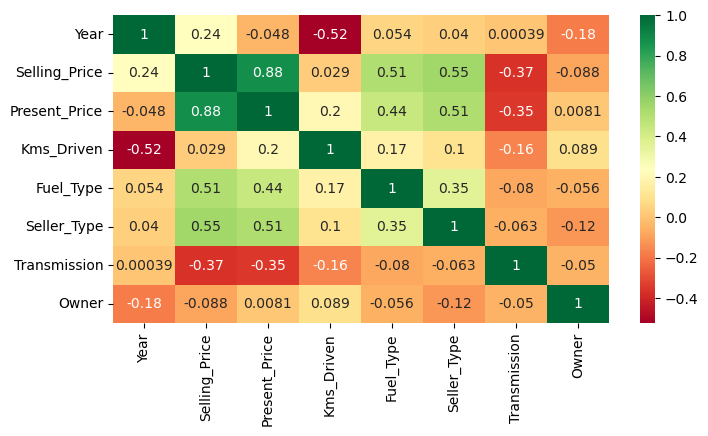

In [208]:
corr = df.corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(corr,cmap = "RdYlGn",annot=True)

In [215]:
#Correlation of all feature with selling price
df.corrwith(df['Selling_Price']).sort_values(ascending=False)
#Below is the correlation with the target variable Selling price

Selling_Price    1.000000
Present_Price    0.878983
Seller_Type      0.550724
Fuel_Type        0.509467
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Transmission    -0.367128
dtype: float64

## Feature selection through Mutual Information and Information Gain

In [217]:
# Applying the Mutual Regression
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(x,y)
mrs_score = pd.Series(mir,index=x.columns)
mrs_score.sort_values(ascending=False)

Present_Price    1.306261
Seller_Type      0.576726
Year             0.263160
Fuel_Type        0.188756
Kms_Driven       0.160333
Transmission     0.108206
Owner            0.021633
dtype: float64

In [221]:
#Observing the feature correlation & the mutual information feature selection.the impact of each feature in inderstood with respect to the target selling price

# Implementing Logistic Regression Machine Learning Algorithmn

## Spliting Data into Train & Test

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [224]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


## Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [226]:
y_pred = classifier.predict(X_test)

<Axes: xlabel='Actual', ylabel='diff'>

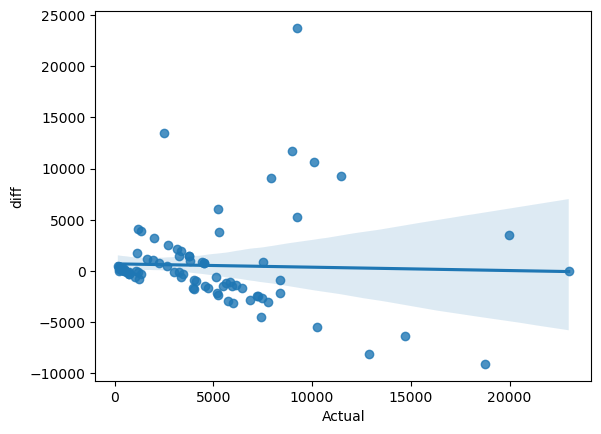

In [264]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result['diff']=result['Predicted']-result['Actual']
sns.regplot(x='Actual',y='diff',data=result)

## Evaluating Model

#### Evaluating model on the following metrics
#### 1.Coefficient of determination
#### 2.Mean square error
#### 3.Mean absolute error

In [236]:
#Coefficienct of determination
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [244]:
r2_score(result['Predicted'],result['Actual'])

0.49485770797916395

In [255]:
#Mean Square Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(result['Actual'],result['Predicted'])
mse

18347648.351648353

In [262]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(result['Actual'],result['Predicted'])
mae

2352.747252747253